In [62]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler 
from sklearn.preprocessing import MinMaxScaler 

from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold

from sklearn.decomposition import PCA 
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

In [3]:
df=sb.load_dataset("titanic")
print(df)
df.info()
df.describe()

# as we can see, there are lots of null values. Damn!

     survived  pclass     sex   age  sibsp  parch     fare embarked   class  \
0           0       3    male  22.0      1      0   7.2500        S   Third   
1           1       1  female  38.0      1      0  71.2833        C   First   
2           1       3  female  26.0      0      0   7.9250        S   Third   
3           1       1  female  35.0      1      0  53.1000        S   First   
4           0       3    male  35.0      0      0   8.0500        S   Third   
..        ...     ...     ...   ...    ...    ...      ...      ...     ...   
886         0       2    male  27.0      0      0  13.0000        S  Second   
887         1       1  female  19.0      0      0  30.0000        S   First   
888         0       3  female   NaN      1      2  23.4500        S   Third   
889         1       1    male  26.0      0      0  30.0000        C   First   
890         0       3    male  32.0      0      0   7.7500        Q   Third   

       who  adult_male deck  embark_town alive  alo

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [4]:
df.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [ ]:
# drop the rows with missing values 
df.dropna(inplace=True)
df.info()
# but damn did this remove rows, my man removed more than 70% rows.
#clearly we need to embedd some data in those places or remove the feature, instead of removing the rows

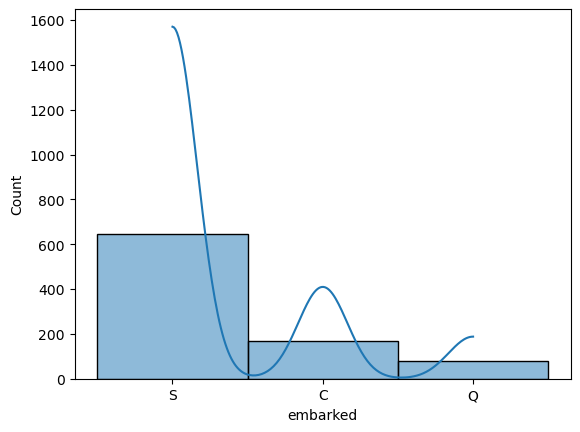

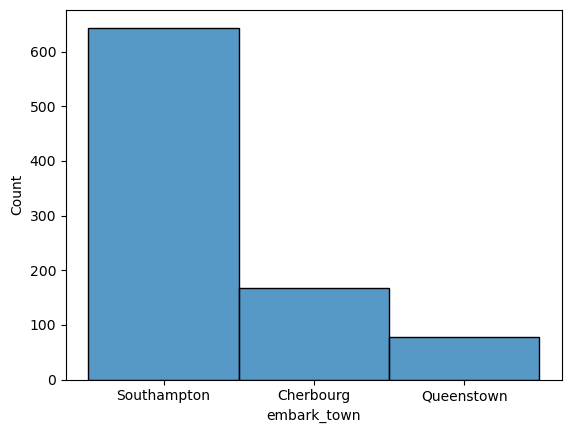

In [5]:
sb.histplot(data=df["embarked"], kde=True)
plt.show()
# so S is more than any other category
sb.histplot(data=df["embark_town"])
plt.show()
# so S is more than any other category

In [6]:
print(df["embarked"]==None)

0      False
1      False
2      False
3      False
4      False
       ...  
886    False
887    False
888    False
889    False
890    False
Name: embarked, Length: 891, dtype: bool


In [7]:
# what if our unknown values are not NaN and was some values like "unknow"
# fillna() will not work on those, in such cases use
df["embarked"]=df["embarked"].replace("unknown",np.nan)

In [8]:
# age is numerical, might as well replace missing with mean values
df["age"]=df["age"].fillna(df["age"].mean())
# df.info()

# deck is categorical and there are too many values missing, let's drop that feature 
df=df.drop(["deck"],axis=1);
# df=df.drop([1,2,4],axis=0); # this drops rows with index values 
# df.info()

# embarked is categorical and S is the category seen the most, so replacing missing data with S
df["embarked"]=df["embarked"].fillna("S")
# df.info()

# embark_town is categorical and Southampton is the category seen the most, so replacing missing data with Southampton
df["embark_town"]=df["embark_town"].fillna("Southampton")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          891 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     891 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  embark_town  891 non-null    object  
 12  alive        891 non-null    object  
 13  alone        891 non-null    bool    
dtypes: bool(2), category(1), float64(2), int64(4), object(5)
memory usage: 79.4+ KB


In [9]:
# remove any duplicates that may cause noise in the training 

# df1 = df.drop_duplicates()
# df1.info()
# df2 = df.drop_duplicates(subset=["embark_town"]) # delete duplicates based on a feature
# df2.info()

df=df.drop_duplicates()

In [10]:
df.columns

Index(['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare',
       'embarked', 'class', 'who', 'adult_male', 'embark_town', 'alive',
       'alone'],
      dtype='object')

In [11]:
# encode categorical data 
# ordinal data (levels in categories) use label encoder 
# nominal features (no order among categories )  use one-hot encoding 
# ONE HOT ENCODER 
df = pd.get_dummies(df,columns=["sex","embarked",'who', 'adult_male', 'embark_town', 'alive',
       'alone'], drop_first=True)

# LABEL ENCODER 
le = LabelEncoder()
df["class"]= le.fit_transform(df["class"])

print(df)


     survived  pclass        age  sibsp  parch     fare  class  sex_male  \
0           0       3  22.000000      1      0   7.2500      2      True   
1           1       1  38.000000      1      0  71.2833      0     False   
2           1       3  26.000000      0      0   7.9250      2     False   
3           1       1  35.000000      1      0  53.1000      0     False   
4           0       3  35.000000      0      0   8.0500      2      True   
..        ...     ...        ...    ...    ...      ...    ...       ...   
885         0       3  39.000000      0      5  29.1250      2     False   
887         1       1  19.000000      0      0  30.0000      0     False   
888         0       3  29.699118      1      2  23.4500      2     False   
889         1       1  26.000000      0      0  30.0000      0      True   
890         0       3  32.000000      0      0   7.7500      2      True   

     embarked_Q  embarked_S  who_man  who_woman  adult_male_True  \
0         False    

In [12]:
# conversion of types

# df['date'] = pd.to_datetime(['2025-01-01', '2025-02-05', '2025-02-20'])

# I would like every value as a number 
for f in df:
    if(df[f].dtype == "float") :
        continue
    df[f]= df[f].astype("int")
print(df)

     survived  pclass        age  sibsp  parch     fare  class  sex_male  \
0           0       3  22.000000      1      0   7.2500      2         1   
1           1       1  38.000000      1      0  71.2833      0         0   
2           1       3  26.000000      0      0   7.9250      2         0   
3           1       1  35.000000      1      0  53.1000      0         0   
4           0       3  35.000000      0      0   8.0500      2         1   
..        ...     ...        ...    ...    ...      ...    ...       ...   
885         0       3  39.000000      0      5  29.1250      2         0   
887         1       1  19.000000      0      0  30.0000      0         0   
888         0       3  29.699118      1      2  23.4500      2         0   
889         1       1  26.000000      0      0  30.0000      0         1   
890         0       3  32.000000      0      0   7.7500      2         1   

     embarked_Q  embarked_S  who_man  who_woman  adult_male_True  \
0             0    

In [13]:
# FEATURE SCALING 
# scale to get mean = 0 and standard deviation = 1 
ss = StandardScaler() 
for f in df:
    df[f] = ss.fit_transform(df[[f]]) # notice that standard  scaler only takes 2d array as input. so df[[f]] is used to return 2d df
df.describe() 

# scale to get min=0 and max = 1 
mms = MinMaxScaler() 
for f in df:
    df[f] = mms.fit_transform(df[[f]])
df.describe()

,survived,pclass,age,sibsp,parch,fare,class,sex_male,embarked_Q,embarked_S,who_man,who_woman,adult_male_True,embark_town_Queenstown,embark_town_Southampton,alive_yes,alone_True
count,780.000000,780.000000,780.000000,780.000000,780.000000,780.000000,780.000000,780.000000,780.000000,780.000000,780.000000,780.000000,780.000000,780.000000,780.000000,780.000000,780.000000
mean,0.412821,0.623077,0.369158,0.065705,0.069658,0.067982,0.623077,0.625641,0.074359,0.726923,0.574359,0.320513,0.574359,0.074359,0.726923,0.412821,0.566667
std,0.492657,0.427226,0.172265,0.123506,0.139756,0.102011,0.427226,0.484267,0.262523,0.445826,0.494757,0.466973,0.494757,0.262523,0.445826,0.492657,0.495854
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.268032,0.000000,0.000000,0.015713,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,1.000000,0.367921,0.000000,0.000000,0.031132,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000
75%,1.000000,1.000000,0.447097,0.125000,0.166667,0.067096,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [54]:
# test train splitting 
Xdf = df.drop("class", axis=1)
Ydf = pd.DataFrame([it>=0.5 for it in df["class"]],columns=["class"])

# print(Xdf.info())
# print(Ydf.info()) 
# print(Ydf)

X_train, X_test, Y_train, Y_test = train_test_split(Xdf, Ydf, test_size=0.2, stratify=Ydf)

In [55]:
print(Xdf.loc[2,:])

survived                   1.000000
pclass                     1.000000
age                        0.321438
sibsp                      0.000000
parch                      0.000000
fare                       0.015469
sex_male                   0.000000
embarked_Q                 0.000000
embarked_S                 1.000000
who_man                    0.000000
who_woman                  1.000000
adult_male_True            0.000000
embark_town_Queenstown     0.000000
embark_town_Southampton    1.000000
alive_yes                  1.000000
alone_True                 1.000000
Name: 2, dtype: float64


In [56]:
# K FOLD CROSS VALIDATION 
# use just KFold for unlabelled data 
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

for train_index, test_index in skf.split(Xdf,Ydf):
    # print(train_index, test_index) 
    X_train = Xdf.iloc[train_index,:]
    Y_train = Ydf.loc[train_index]
    X_test = Xdf.iloc[test_index,:]
    Y_test = Ydf.iloc[test_index]

In [59]:
# Dimensionality reduction using PCA
pca = PCA(n_components=2)
reduced = pca.fit_transform(df)
reducedDF= pd.DataFrame(reduced, columns=["X","Y"])
reducedDF["label"]=Ydf["class"]

<Axes: xlabel='X', ylabel='Y'>

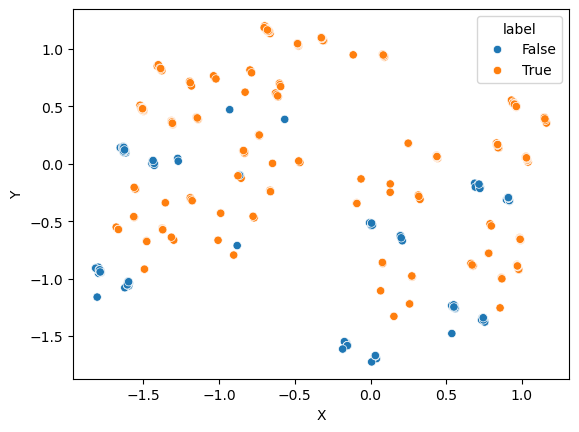

In [60]:
sb.scatterplot(x="X", y="Y", data=reducedDF, hue="label")

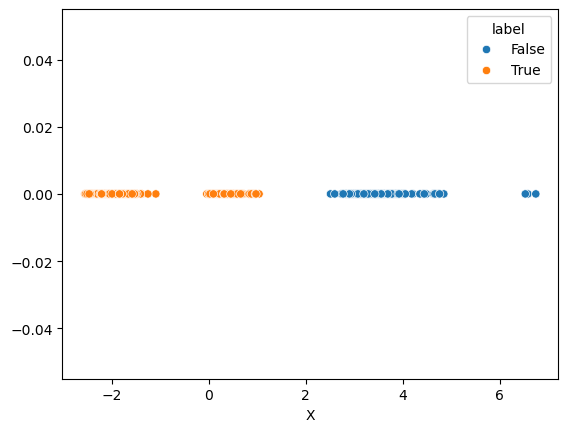

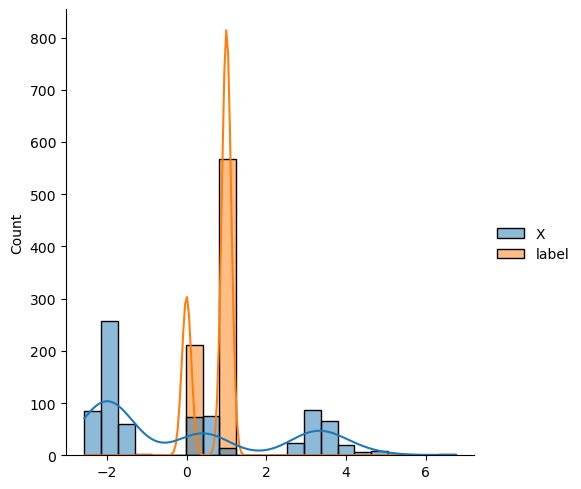

In [83]:
lda = LDA(n_components=1) 
reduced= lda.fit_transform(Xdf,Ydf["class"])
reducedDF = pd.DataFrame(reduced,columns=["X"])
reducedDF["label"]=Ydf["class"] 

sb.scatterplot(x="X", y=0, data=reducedDF, hue="label")
plt.show()
# sb.histplot( data=reducedDF, kde=True)
sb.displot( data=reducedDF, kde=True)
plt.show()